# Make $\Omega(f)$ injections for O5 studies

In [9]:
###################
# Import packages #
###################

from matplotlib import pyplot as plt
import numpy as np
import bilby
import bilby.gw.detector as bilbydet
import scipy
from scipy.io import savemat
import csv

In [10]:
##############################
# Things related to plotting #
##############################

import matplotlib.pylab as plt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"]="Times New Roman"
rc_fonts = {
"text.usetex": True,
}
plt.rcParams.update(rc_fonts)
plt.rcParams["figure.figsize"] = (8,6) 

import seaborn as sns
my_palette = sns.color_palette("colorblind")

## Import PI curves for detectability reference

In [11]:
freqs_PI_O5 = np.array([])
omega_PI_O5 = np.array([])

with open('../input/O5_PI_curve.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        freqs_PI_O5 = np.append(freqs_PI_O5,float(row[0]))
        omega_PI_O5 = np.append(omega_PI_O5,float(row[1]))
        line_count += 1

In [12]:
freqs_PI_O3 = np.array([])
omega_PI_O3 = np.array([])

with open('../input/O3_PI_curve.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        freqs_PI_O3 = np.append(freqs_PI_O3,float(row[0]))
        omega_PI_O3 = np.append(omega_PI_O3,float(row[1]))
        line_count += 1

## Madau-Dickinson SFR

### Detectable injection in O5

In [13]:
frequencies = np.arange(20, 256, 0.03125)

ligo_noise_asd = np.loadtxt("./AplusDesign.txt")[:,1] 
ligo_noise_psd = ligo_noise_asd**2
freqs = np.loadtxt("../data/AplusDesign.txt")[:,0] 
ligo_noise_psd = np.interp(frequencies, freqs, ligo_noise_psd)[:np.size(frequencies)]

H0 = 2.192711267238057e-18

df = frequencies[1]-frequencies[0]
T = 365 * 24 * 3600 #1 year observing time
H = (3*H0**2) / (10*np.pi**2*frequencies**3)
norm=1

orf_12 = np.load("./ORF_HL.npy")
orf_12_freqs = np.load("./ORF_HL_freqs.npy")

orf_func = scipy.interpolate.interp1d(orf_12_freqs,orf_12)

sigma_12 = np.sqrt((1/norm**2) * 1/(2*T*df) * ligo_noise_psd**2 * 1/(H*orf_func(frequencies))**2)

In [14]:
omega_f_detectable = np.load("./Omega_detectable_O5_MD.npy")
freqs_file_detectable = np.load("./freqs_detectable_O5.npy")

In [15]:
omega_func_detectable = scipy.interpolate.interp1d(freqs_file_detectable,omega_f_detectable)

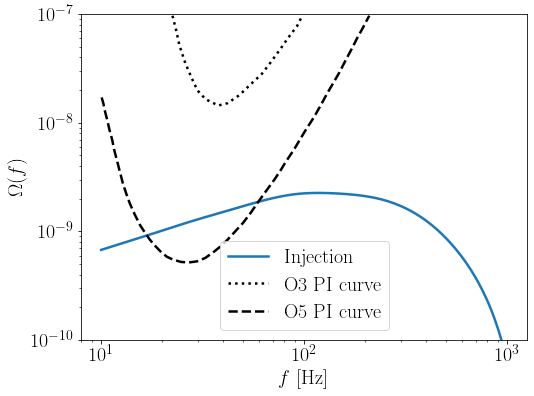

In [16]:
plt.loglog(freqs_file_detectable, omega_f_detectable,lw=2.5, label="Injection")
plt.loglog(freqs_PI_O3,omega_PI_O3,lw=2.5,ls='dotted',c='k',label="O3 PI curve")
plt.loglog(freqs_PI_O5,omega_PI_O5,lw=2.5,ls='dashed',c='k',label="O5 PI curve")
plt.xlabel("$f$ [Hz]")
plt.ylabel("$\Omega(f)$")
plt.ylim(1e-10,1e-7)
plt.legend()

In [17]:
Y_HL = omega_func_detectable(frequencies) + sigma_12 * np.random.randn(frequencies.size)

In [18]:
matdict_detectable = {"freq": frequencies.T, "ptEst_ff":Y_HL.T, "sigma_ff": sigma_12.T}

In [31]:
savemat("./Omega_measurement_detectable_O5_MD.mat", matdict_detectable)

### Undetectable injection in O5

In [19]:
frequencies = np.arange(20, 256, 0.03125)

ligo_noise_asd = np.loadtxt("./AplusDesign.txt")[:,1] 
ligo_noise_psd = ligo_noise_asd**2
freqs = np.loadtxt("./AplusDesign.txt")[:,0] 
ligo_noise_psd = np.interp(frequencies, freqs, ligo_noise_psd)[:np.size(frequencies)]

H0 = 2.192711267238057e-18

df = frequencies[1]-frequencies[0]
T = 365 * 24 * 3600 #1 year observing time
H = (3*H0**2) / (10*np.pi**2*frequencies**3)
norm=1

orf_12 = np.load("./ORF_HL.npy")
orf_12_freqs = np.load("./ORF_HL_freqs.npy")

orf_func = scipy.interpolate.interp1d(orf_12_freqs,orf_12)

sigma_12 = np.sqrt((1/norm**2) * 1/(2*T*df) * ligo_noise_psd**2 * 1/(H*orf_func(frequencies))**2)

In [20]:
omega_f_undetectable = np.load("./Omega_undetectable_O5_MD.npy")
freqs_file_undetectable = np.load("./freqs_undetectable_O5.npy")

In [21]:
omega_func_undetectable = scipy.interpolate.interp1d(freqs_file_undetectable,omega_f_undetectable)

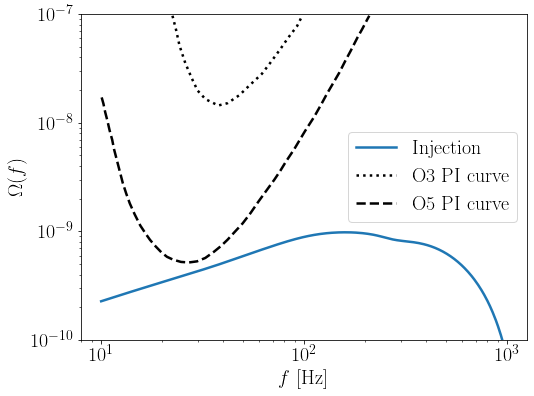

In [22]:
plt.loglog(freqs_file_undetectable, omega_f_undetectable,lw=2.5, label="Injection")
plt.loglog(freqs_PI_O3,omega_PI_O3,lw=2.5,ls='dotted',c='k',label="O3 PI curve")
plt.loglog(freqs_PI_O5,omega_PI_O5,lw=2.5,ls='dashed',c='k',label="O5 PI curve")
plt.xlabel("$f$ [Hz]")
plt.ylabel("$\Omega(f)$")
plt.ylim(1e-10,1e-7)
plt.legend()

In [36]:
Y_HL = omega_func_undetectable(frequencies) + sigma_12 * np.random.randn(frequencies.size)

In [37]:
matdict_undetectable = {"freq": frequencies.T, "ptEst_ff":Y_HL.T, "sigma_ff": sigma_12.T}

In [38]:
savemat("./Omega_measurement_undetectable_O5_MD.mat", matdict_undetectable)

## Vangioni + SFR

### Detectable injection in O5

In [23]:
frequencies = np.arange(20, 256, 0.03125)

ligo_noise_asd = np.loadtxt("./AplusDesign.txt")[:,1] 
ligo_noise_psd = ligo_noise_asd**2
freqs = np.loadtxt("./AplusDesign.txt")[:,0] 
ligo_noise_psd = np.interp(frequencies, freqs, ligo_noise_psd)[:np.size(frequencies)]

H0 = 2.192711267238057e-18

df = frequencies[1]-frequencies[0]
T = 365 * 24 * 3600 #1 year observing time
H = (3*H0**2) / (10*np.pi**2*frequencies**3)
norm=1

orf_12 = np.load("./ORF_HL.npy")
orf_12_freqs = np.load("./ORF_HL_freqs.npy")

orf_func = scipy.interpolate.interp1d(orf_12_freqs,orf_12)

sigma_12 = np.sqrt((1/norm**2) * 1/(2*T*df) * ligo_noise_psd**2 * 1/(H*orf_func(frequencies))**2)

In [24]:
omega_f_detectable = np.load("./Omega_detectable_O5_VA.npy")
freqs_file_detectable = np.load("./freqs_detectable_O5.npy")

In [25]:
omega_func_detectable = scipy.interpolate.interp1d(freqs_file_detectable,omega_f_detectable)

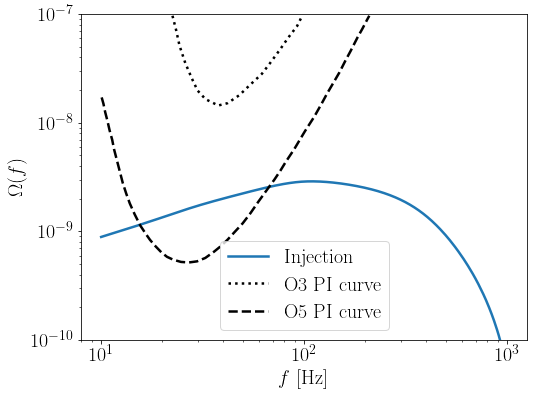

In [26]:
plt.loglog(freqs_file_detectable, omega_f_detectable,lw=2.5, label="Injection")
plt.loglog(freqs_PI_O3,omega_PI_O3,lw=2.5,ls='dotted',c='k',label="O3 PI curve")
plt.loglog(freqs_PI_O5,omega_PI_O5,lw=2.5,ls='dashed',c='k',label="O5 PI curve")
plt.xlabel("$f$ [Hz]")
plt.ylabel("$\Omega(f)$")
plt.ylim(1e-10,1e-7)
plt.legend()

In [43]:
Y_HL = omega_func_detectable(frequencies) + sigma_12 * np.random.randn(frequencies.size)

In [44]:
matdict_detectable = {"freq": frequencies.T, "ptEst_ff":Y_HL.T, "sigma_ff": sigma_12.T}

In [45]:
savemat("./Omega_measurement_detectable_O5_VA.mat", matdict_detectable)

### Undetectable injection in O5

In [27]:
frequencies = np.arange(20, 256, 0.03125)

ligo_noise_asd = np.loadtxt("./AplusDesign.txt")[:,1] 
ligo_noise_psd = ligo_noise_asd**2
freqs = np.loadtxt("./AplusDesign.txt")[:,0] 
ligo_noise_psd = np.interp(frequencies, freqs, ligo_noise_psd)[:np.size(frequencies)]

H0 = 2.192711267238057e-18

df = frequencies[1]-frequencies[0]
T = 365 * 24 * 3600 #1 year observing time
H = (3*H0**2) / (10*np.pi**2*frequencies**3)
norm=1

orf_12 = np.load("./ORF_HL.npy")
orf_12_freqs = np.load("./ORF_HL_freqs.npy")

orf_func = scipy.interpolate.interp1d(orf_12_freqs,orf_12)

sigma_12 = np.sqrt((1/norm**2) * 1/(2*T*df) * ligo_noise_psd**2 * 1/(H*orf_func(frequencies))**2)

In [28]:
omega_f_undetectable = np.load("./Omega_undetectable_O5_VA.npy")
freqs_file_undetectable = np.load("./freqs_undetectable_O5.npy")

In [29]:
omega_func_undetectable = scipy.interpolate.interp1d(freqs_file_undetectable,omega_f_undetectable)

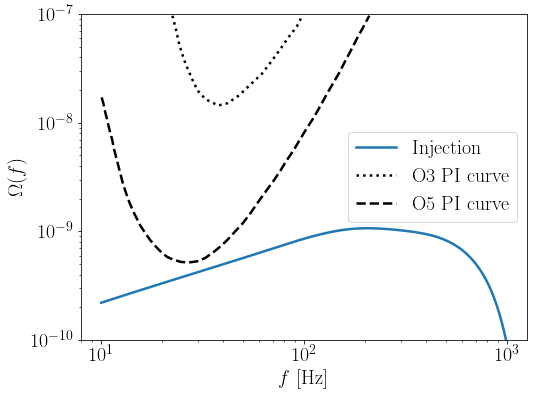

In [30]:
plt.loglog(freqs_file_undetectable, omega_f_undetectable,lw=2.5, label="Injection")
plt.loglog(freqs_PI_O3,omega_PI_O3,lw=2.5,ls='dotted',c='k',label="O3 PI curve")
plt.loglog(freqs_PI_O5,omega_PI_O5,lw=2.5,ls='dashed',c='k',label="O5 PI curve")
plt.xlabel("$f$ [Hz]")
plt.ylabel("$\Omega(f)$")
plt.ylim(1e-10,1e-7)
plt.legend()

In [50]:
Y_HL = omega_func_undetectable(frequencies) + sigma_12 * np.random.randn(frequencies.size)

In [51]:
matdict_undetectable = {"freq": frequencies.T, "ptEst_ff":Y_HL.T, "sigma_ff": sigma_12.T}

In [52]:
savemat("./Omega_measurement_undetectable_O5_VA.mat", matdict_undetectable)